In [1]:
import pandas as pd                # Pandas used to manipulate the dataset
import numpy as np                 # numpy is used to manipulate the Numerical and dimentional manipulation of data
import math
import seaborn as sns              # for visualization purpose using this seaborn
import matplotlib.pyplot as plt           # for visualization purpose using this Matplotlib
%matplotlib inline 
from sklearn.model_selection import train_test_split   # SCIKIT Learn is used to perform machine learning(Here: Training and Testing data split)
from sklearn.preprocessing import LabelEncoder
print("Libraries Loaded...")      

Libraries Loaded...


In [2]:
train = pd.read_csv("train.csv")     # reading CSV file using pandas
train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [3]:
test  = pd.read_csv("test.csv")      # reading  CSV file using pandas
test.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324


In [4]:
train_df=pd.DataFrame(train)
train_df.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


# Relevent Features used to predict the data

features=['rooms','v14a','refrig','abastaguano','sanitario1','lugar1','lugar2','lugar3','lugar4','lugar5','lugar6','area1','area2']


In [5]:
test_df=pd.DataFrame(test)
test_df.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324


#                                        Understand the type of data

In [6]:
train_df.shape

(9557, 143)

In [7]:
test_df.shape

(23856, 142)

In [8]:
#train_df.info(verbose = True)

# Q1. Identify the output variable.

# "Target Column in the csv file Is the Output variable"

# Q7. Count how many null values are existing in columns

In [9]:
for i in train_df.columns:
    if train_df[i].isna().sum() >1:
        print('Total null values in\t',i,'= ',train_df[i].isna().sum())  # Summing all the null values

Total null values in	 v2a1 =  6860
Total null values in	 v18q1 =  7342
Total null values in	 rez_esc =  7928
Total null values in	 meaneduc =  5
Total null values in	 SQBmeaned =  5


# Total number of missing values in the dataset

In [10]:
print("Total null values in the dataset",' = ',train_df.isna().sum().sum()) # Summing all the null values in whole dataset

Total null values in the dataset  =  22140


# Missing Data Handlining

In [11]:
v2a1_mean=int(train_df['v2a1'].mean())
print("Mean value for v2a1 column = ", v2a1_mean)
print("\n\t\t\t\tReplacing the missing values with mean values of the column")
train_df['v2a1'].fillna(value=v2a1_mean,inplace=True)    # Replacing the missing values with mean values of the column
train_df.head()

Mean value for v2a1 column =  165231

				Replacing the missing values with mean values of the column


,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,165231.0,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [12]:
v18q1_mean=int(train_df['v18q1'].mean())
print("Mean value for v18q1 column = ", v18q1_mean)
print("\n\t\t\t\tReplacing the missing values with mean values of the column")
train_df['v18q1'].fillna(value=v18q1_mean,inplace=True)    # Replacing the missing values with mean values of the column
train_df.head()

Mean value for v18q1 column =  1

				Replacing the missing values with mean values of the column


,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,1.0,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,165231.0,0,8,0,1,1,0,1.0,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [13]:
rez_esc_mean=int(train_df['rez_esc'].mean())
print("Mean value for rez_esc column = ", rez_esc_mean)
print("\n\t\t\t\tReplacing the missing values with mean values of the column")
train_df['rez_esc'].fillna(value=rez_esc_mean,inplace=True)    # Replacing the missing values with mean values of the column
train_df.head()

Mean value for rez_esc column =  0

				Replacing the missing values with mean values of the column


,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,1.0,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,165231.0,0,8,0,1,1,0,1.0,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [14]:
meaneduc_mean=int(train_df['meaneduc'].mean())
print("Mean value for meaneduc column = ", meaneduc_mean)
print("\n\t\t\t\tReplacing the missing values with mean values of the column")
train_df['meaneduc'].fillna(value=meaneduc_mean,inplace=True)    # Replacing the missing values with mean values of the column
train_df.head()

Mean value for meaneduc column =  9

				Replacing the missing values with mean values of the column


,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,1.0,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,165231.0,0,8,0,1,1,0,1.0,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [15]:
SQBmeaned_mean=int(train_df['SQBmeaned'].mean())
print("Mean value for SQBmeaned column = ", SQBmeaned_mean)
print("\n\t\t\t\tReplacing the missing values with mean values of the column")
train_df['SQBmeaned'].fillna(value=SQBmeaned_mean,inplace=True)    # Replacing the missing values with mean values of the column
train_df.head()

Mean value for SQBmeaned column =  102

				Replacing the missing values with mean values of the column


,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,1.0,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,165231.0,0,8,0,1,1,0,1.0,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


# Check For Missing Data That Was filled or not

In [16]:
for i in train_df.columns:
    if train_df[i].isna().sum() >1:
        print('Total null values in\t',i,'= ',train_df[i].isna().sum())  # Summing all the null values
else:
    print("There is no null value (or) Values are replaced with the mean values of tye column")

There is no null value (or) Values are replaced with the mean values of tye column


# Q4. Check whether all members of the house have the same poverty level.


In [66]:
print("House Id with different Poverty Level : ", train_df.groupby('idhogar')['Target'].unique().head())

House Id with different Poverty Level :  idhogar
001ff74ca    [4]
003123ec2    [2]
004616164    [2]
004983866    [3]
005905417    [2]
Name: Target, dtype: object


# Enable Encoding method for the catagorical data

In [17]:
for i in train_df.columns:
    if train_df[i].dtype == 'object':
        print(i,'= ',train_df[i].dtype)

Id =  object
idhogar =  object
dependency =  object
edjefe =  object
edjefa =  object


In [67]:
idhog_=list(train_df["idhogar"].unique())
for temp in idhog_:
    (temp,'=',list(train_df["idhogar"]).count(temp))


In [19]:
dep_=list(train_df["dependency"].unique())
for temp in dep_:
    print(temp,'=',list(train_df["dependency"]).count(temp))

no = 1747
8 = 378
yes = 2192
3 = 236
.5 = 1497
.25 = 260
2 = 730
.66666669 = 487
.33333334 = 598
1.5 = 713
.40000001 = 84
.75 = 98
1.25 = 18
.2 = 90
2.5 = 77
1.2 = 11
4 = 100
1.3333334 = 84
2.25 = 13
.22222222 = 11
5 = 24
.83333331 = 11
.80000001 = 18
6 = 7
3.5 = 18
1.6666666 = 8
.2857143 = 9
1.75 = 11
.71428573 = 12
.16666667 = 7
.60000002 = 8


In [20]:

ED1=train_df["edjefe"].unique() 
for temp in ED1:
    print(temp,'=',list(train_df["edjefe"]).count(temp))

10 = 111
12 = 113
no = 3762
11 = 751
9 = 486
15 = 285
4 = 137
6 = 1845
8 = 257
17 = 202
7 = 234
16 = 134
14 = 208
5 = 222
21 = 43
2 = 194
19 = 14
yes = 123
3 = 307
18 = 19
13 = 103
20 = 7


In [21]:
ED2=train_df["edjefa"].unique() 
for temp in ED2:
    print(temp,'=',list(train_df["edjefa"]).count(temp))

no = 6230
11 = 399
4 = 136
10 = 96
9 = 237
15 = 188
7 = 179
14 = 120
13 = 52
8 = 217
17 = 76
6 = 947
5 = 176
3 = 152
16 = 113
19 = 4
yes = 69
21 = 5
12 = 72
2 = 84
20 = 2
18 = 3


In [22]:
le_Id = LabelEncoder()
#le_idhogar =  LabelEncoder()
le_dependency =  LabelEncoder()
le_edjefe =  LabelEncoder()
le_edjefa =  LabelEncoder()

In [23]:
#train_df['ID']=le_Id.fit_transform(train_df['ID'])
train_df['dependency']=le_dependency.fit_transform(train_df['dependency'])
train_df['edjefe']=le_edjefe.fit_transform(train_df['edjefe'])
train_df['edjefa']=le_edjefa.fit_transform(train_df['edjefa'])

dummy=pd.get_dummies(train_df['v2a1'])

# Q3. Check if there are any biases in your dataset.

Number of elements in  1  =  755
Number of elements in  2  =  1597
Number of elements in  3  =  1209
Number of elements in  4  =  5996


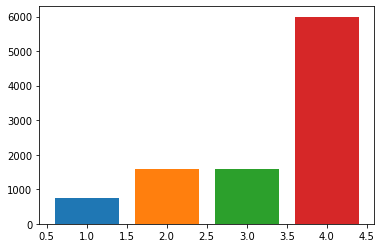

In [24]:
val= list(train_df[['Target']] .values)
uniq=list(np.unique(train_df['Target']))             # This is unique values in the target column
#print("Unique Values in TARGET colimn are : ", uniq,'\n')
valu=[]
for j in uniq:
    valu.append(val.count(j))
    print('Number of elements in ',j,' = ',val.count(j))
    plt.bar(j,valu)

In [25]:
'''correlation= train_df.corr()
print(correlation['v2a1'].values>-0.5)
correlation'''

"correlation= train_df.corr()\nprint(correlation['v2a1'].values>-0.5)\ncorrelation"

<AxesSubplot:>

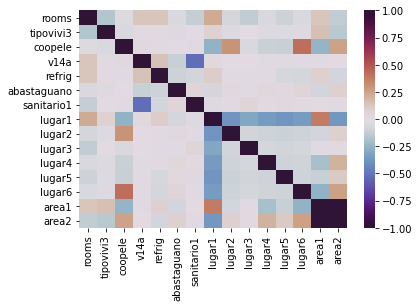

In [26]:
sns.heatmap(train_df[['rooms','tipovivi3','coopele','v14a','refrig','abastaguano','sanitario1','lugar1','lugar2','lugar3','lugar4','lugar5','lugar6','area1','area2']].corr(),cmap="twilight_shifted")

In [40]:
#features=['rooms','v14a','refrig','abastaguano','sanitario1','lugar1','lugar2','lugar3','lugar4','lugar5','lugar6','area1','area2']
x_train=train_df.drop(['Target','Id','idhogar'],axis=1) # Assigning feartures
x_train.head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,190000.0,0,3,0,1,1,0,1.0,0,1,...,43,100,1849,1,100,0,1.000000,0.0,100.0,1849
1,135000.0,0,4,0,1,1,1,1.0,0,1,...,67,144,4489,1,144,0,1.000000,64.0,144.0,4489
2,165231.0,0,8,0,1,1,0,1.0,0,0,...,92,121,8464,1,0,0,0.250000,64.0,121.0,8464
3,180000.0,0,5,0,1,1,1,1.0,0,2,...,17,81,289,16,121,4,1.777778,1.0,121.0,289
4,180000.0,0,5,0,1,1,1,1.0,0,2,...,37,121,1369,16,121,4,1.777778,1.0,121.0,1369


In [41]:
y_train=train_df[['Target']]              # Assigning target variable
y_train.head()

,Target
0,4
1,4
2,4
3,4
4,4


In [42]:
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.3,random_state=123)
print("Train & test data splitted successfully")

Train & test data splitted successfully


In [43]:
train_df.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,1.0,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,165231.0,0,8,0,1,1,0,1.0,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [44]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6689, 140)
(2868, 140)
(6689, 1)
(2868, 1)


In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr=LinearRegression(normalize=True)
lr.fit(x_train,y_train)
print(math.sqrt( mean_squared_error (y_train , lr.predict (x_train))))
print(math.sqrt( mean_squared_error (y_test , lr.predict (x_test ))))
print('R2 Value/Coefficient of Determination: {}'.format( lr.score (x_test , y_test )))
predictions=lr.predict(x_train)
print('Predicted_data = ',predictions[:5])

0.8106221160734605
0.8082601001146387
R2 Value/Coefficient of Determination: 0.3523738002461617
Predicted_data =  [[3.2109375]
 [3.5625   ]
 [2.6953125]
 [3.703125 ]
 [3.46875  ]]


# Q9. Predict the accuracy using random forest classifier.

# Prediction and Acuracy valuvation

In [46]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(random_state=123)
classifier.fit(x_train,y_train.values.ravel())

RandomForestClassifier(random_state=123)

In [47]:
y_pred_test = classifier.predict(x_test)
y_pred_test

array([1, 4, 4, ..., 4, 4, 2], dtype=int64)

In [48]:
classifier.score(x_test,y_test)

0.9079497907949791

# Q10. Check the accuracy using random forest with cross validation.

In [54]:
# Accuracy rate
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy Score : ",accuracy_score(y_test, y_pred_test))

Accuracy Score :  0.9079497907949791


In [52]:
print( classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           1       0.93      0.70      0.80       223
           2       0.91      0.82      0.86       468
           3       0.95      0.70      0.81       359
           4       0.90      1.00      0.95      1818

    accuracy                           0.91      2868
   macro avg       0.92      0.81      0.85      2868
weighted avg       0.91      0.91      0.90      2868



In [53]:
# View confusion matrix for test data and predictions
cm=confusion_matrix(y_test, y_pred_test)
cm

array([[ 156,   21,    1,   45],
       [   9,  385,   10,   64],
       [   1,   14,  252,   92],
       [   1,    3,    3, 1811]], dtype=int64)

In [55]:
print(predictions.var())

0.3451027003042477


In [56]:
print(y_pred_test.var())

0.8904561029315937


# Q5 Check if there is a house without a family head

In [57]:
# parentesco1, =1 if household head
#tamhog,estadocivil3,parentesco1
yes=(list(train['parentesco1'].values)).count(0)
no=(list(train['parentesco1'].values)).count(1)
print('Total house without family head : ',yes)

Total house without family head :  6584
